# **Exercício Computacional 1 - PSI3471**

Cezar Gabriel Moreno Almeida Lima - 11806980 </br>
Lucas Harada - 11449492

<h1> <b> Erros quadráticos médios obtidos: </b> </h1> 
Dataset de Treino: 21324151.01090952 <br>
Dataset de Teste: 34687152.180375464

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Adaptando e analisando dados

In [3]:
try:
  cars_data = pd.read_csv("vehicles_cleaned_train.csv")
except:
  cars_data = pd.read_csv("/content/drive/MyDrive/Fundamento de SIstemas Eletrônicos Inteligentes/Exercicios Computacionais/Exercicio 1/vehicles_cleaned_train.csv")

In [4]:
cars_data.head()

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,10400,2011,excellent,4 cylinders,gas,81300,automatic,mid-size,sedan
1,6900,2007,excellent,6 cylinders,gas,79000,automatic,full-size,sedan
2,18900,2018,like new,4 cylinders,gas,5000,automatic,full-size,sedan
3,6000,2010,excellent,4 cylinders,gas,97600,automatic,mid-size,hatchback
4,19995,2013,good,6 cylinders,gas,95782,automatic,mid-size,sedan


In [5]:
fuel_dummy = pd.get_dummies(cars_data['fuel'])
type_dummy = pd.get_dummies(cars_data['type'])
cylinders_dummy = pd.get_dummies(cars_data['cylinders'])
transmission_dummy = pd.get_dummies(cars_data['transmission'])
condition_dummy = pd.get_dummies(cars_data['condition'])
size_dummy = pd.get_dummies(cars_data['size'])

In [6]:
print(size_dummy)

      compact  full-size  mid-size  sub-compact
0           0          0         1            0
1           0          1         0            0
2           0          1         0            0
3           0          0         1            0
4           0          0         1            0
...       ...        ...       ...          ...
8333        0          0         1            0
8334        1          0         0            0
8335        0          1         0            0
8336        1          0         0            0
8337        0          0         1            0

[8338 rows x 4 columns]


transformando parte de dados categoricos para numéricos, utilizaremos o dataframe RESUMO_DATA para ver o resumo de algumas correlacoes

**USANDO DATAFRAME PRA VER VINCULOS**




HEATMAP COMPLETO DO DATAFRAME

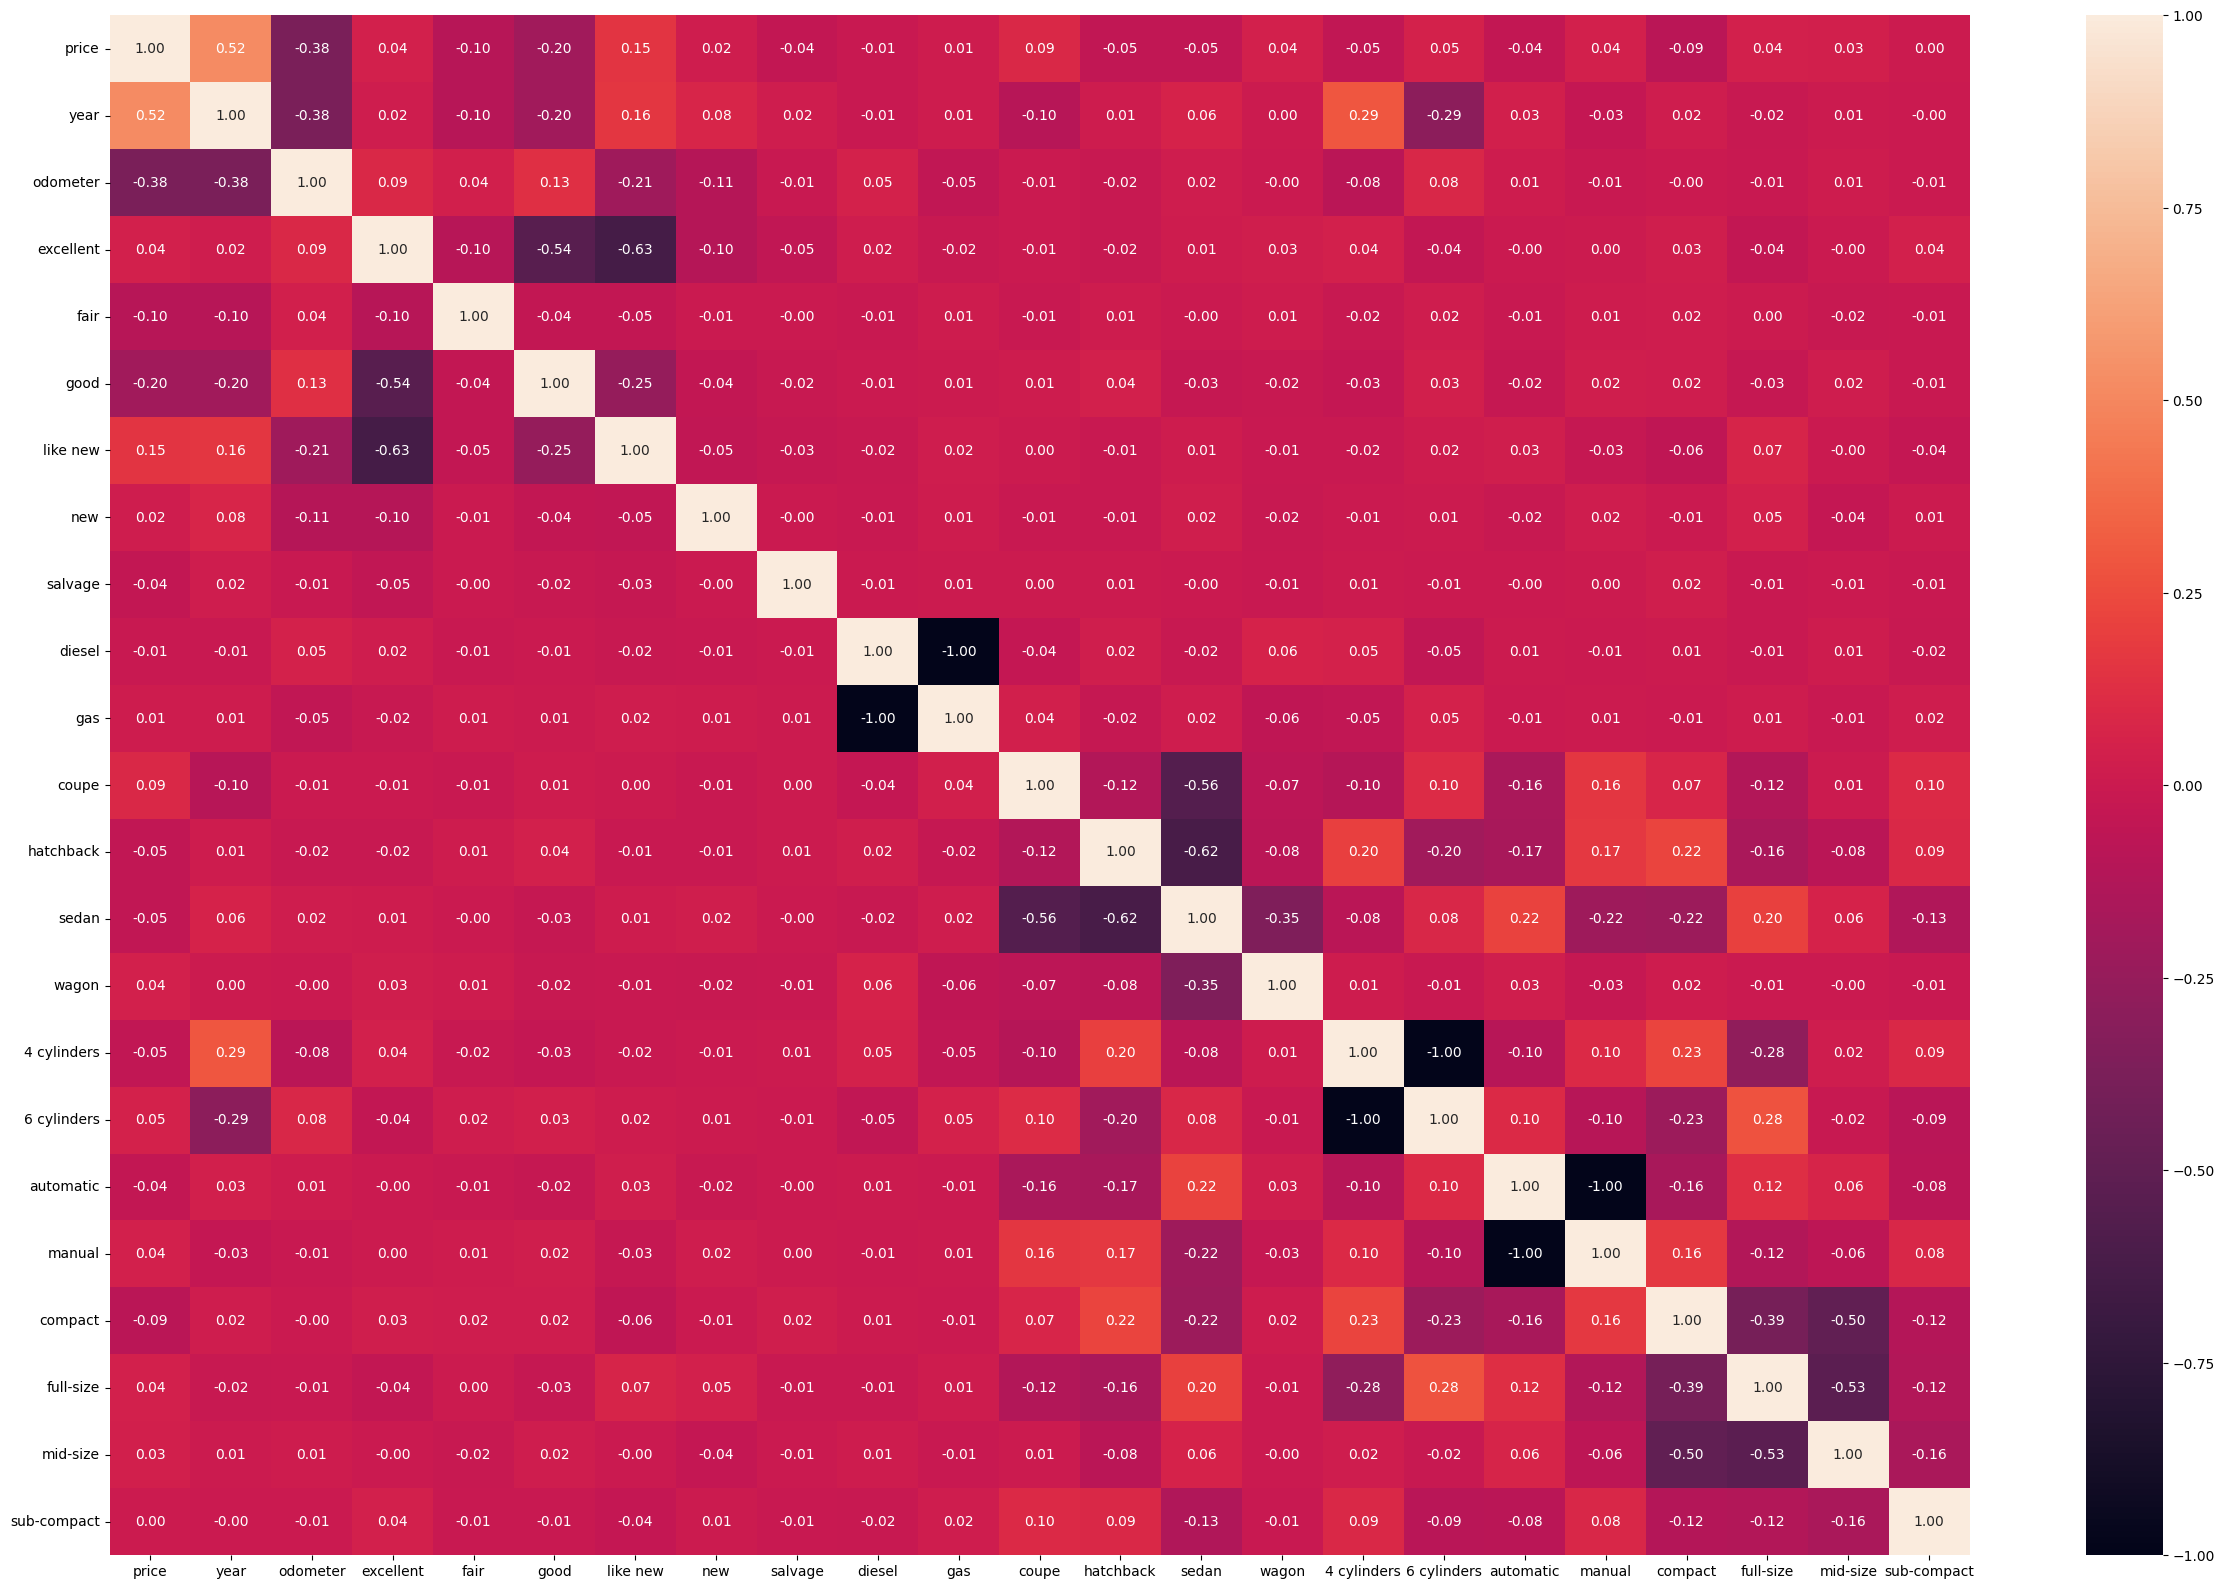

In [7]:
plot_data = cars_data[['price','year', 'odometer']]
plot_data = plot_data.join(condition_dummy)
plot_data = plot_data.join(fuel_dummy)
plot_data = plot_data.join(type_dummy)
plot_data = plot_data.join(cylinders_dummy)
plot_data = plot_data.join(transmission_dummy)
plot_data = plot_data.join(size_dummy)

plt.figure(figsize=(30,20))  # Aumenta o tamanho da figura
sns.heatmap(plot_data.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
#sns.heatmap(feature_corr.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

DADOS PARA A REGRESSÃO LINEAR

In [8]:
cars_data = cars_data.where(cars_data['price'] > 1000).dropna() # Removendo todos os dados de carros abaixo de $1000.00, pois provavelmente são erros e contribuem negativamente para a regressao

In [9]:
dado_final = cars_data[['year', 'odometer']]
dado_final = dado_final.join(condition_dummy)
dado_final = dado_final.join(fuel_dummy)
dado_final = dado_final.join(type_dummy)
dado_final = dado_final.join(cylinders_dummy)
dado_final = dado_final.join(transmission_dummy)
dado_final = dado_final.join(size_dummy)


In [10]:
dado_final.head()

,year,odometer,excellent,fair,good,like new,new,salvage,diesel,gas,...,sedan,wagon,4 cylinders,6 cylinders,automatic,manual,compact,full-size,mid-size,sub-compact
0,2011.0,81300.0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
1,2007.0,79000.0,1,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,1,0,0
2,2018.0,5000.0,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,1,0,0
3,2010.0,97600.0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,2013.0,95782.0,0,0,1,0,0,0,0,1,...,1,0,0,1,1,0,0,0,1,0


In [11]:
corrPositiva = plot_data.corr()['price'].where(plot_data.corr()['price'] > 0.05).dropna()

In [12]:
corrNegativa = plot_data.corr()['price'].where(plot_data.corr()['price'] < -0.05).dropna()

In [13]:
corrThresholded = pd.concat([corrPositiva,corrNegativa],axis=1)
print(corrThresholded)

                price     price
price        1.000000       NaN
year         0.520877       NaN
like new     0.154598       NaN
coupe        0.092854       NaN
6 cylinders  0.052542       NaN
odometer          NaN -0.380056
fair              NaN -0.096375
good              NaN -0.199158
4 cylinders       NaN -0.052542
compact           NaN -0.085695


In [14]:
print(corrThresholded.index) # Estas são as variaveis que serão utilizadas como parametros para a regressao. 

Index(['price', 'year', 'like new', 'coupe', '6 cylinders', 'odometer', 'fair',
       'good', '4 cylinders', 'compact'],
      dtype='object')


**Verificando variáveis que contribuem para o preço de carros mais caros**

In [15]:
carrosCaros = cars_data.where(cars_data['price'] > 20000).dropna()

figure = px.bar(carrosCaros, x = 'price', y = 'fuel', orientation = 'h', title = 'Preço total dos carros caros em relação ao tipo de combustivel')
figure.update_traces(marker_color='green')
figure.show()

In [16]:

figure = px.bar(carrosCaros, x = 'price', y = 'size', orientation = 'h', title = 'Preço total dos carros caros em relação ao tamanho')
figure.update_traces(marker_color='red')
figure.show()

In [17]:
figure = px.bar(carrosCaros, x = 'price', y = 'transmission', orientation = 'h', title = 'Preço total dos carros caros em relação ao tipo de transmissão')
figure.update_traces(marker_color='blue')
figure.show()

In [18]:
figure = px.bar(carrosCaros, x = 'price', y = 'type', orientation = 'h', title = 'Preço total dos carros caros em relação ao tipo de modelo')
figure.update_traces(marker_color='yellow')
figure.show()

In [19]:
figure = px.bar(carrosCaros, x = 'price', y = 'condition', orientation = 'h', title = 'Preço total dos carros caros em relação ao estado do carro')
figure.update_traces(marker_color='gray')
figure.show()

# Funções de Regressão Linear 

*RL() obtém os pesos e resulta_precos utiliza os pesos obtidos anteriormente para estimar preços*

A função **Rl_polinomial** foi importada da aula 1.

In [20]:
def RL(X, d):
    """
    Função que implementa a regressão linear

    X são os dados de entrada
    d é o vetor que contem o sinal desejado ou rótulo

    A função retorna um vetor coluna com m + 1 elementos (dependendo da quantidade de parãmetros)
    """
    # N representa o número de dados para o cálculo da RL
    N = d.shape[0]
    # Com a matrix X e o vetor d (recebido como entrada), calcule a solução wo e o erro e
    # que serão retornados pela função. Você pode usar como base a função RL_reta mostrada anteriormente
  
    #############
    R = X.T @ X
    p = X.T @ d
    #############
    wo = np.linalg.solve(R, p)

    #############
    # Uma vez calculada a solução dos mínimos quadrados, podemos calcular o vetor de erro
    e = d - X @ wo
    #############
    
    return wo, e

In [21]:
def resulta_precos(wo, X):
  m = wo.shape[0]
  N = X.shape[0]
  dn = np.zeros((N, 1))

  for i in range(m):
    if i == 0:
      dn = wo[0] * X[:, 0] ## inicialização necessaria, pq se não dá erro de broadcast pelo tamanho de dn
    else:
      dn += wo[i] * X[:, i]

  return dn

# Obtendo os pesos a partir do dataset de treino

In [22]:
dado_final['year'].min()

2001.0

CRIANDO COMBINAÇÕES DE VARIAVEIS PARA CORRELAÇÃO

In [23]:
#criação de dados combinados entre as colunas originais. No caso de dummies (0 ou 1), só precisa fazer o produto - PRATICAMENTE um AND lógico entre eles 

  #vair varrer todas as linhas do dataframe especificado, todas as colunas tem mesmo numero de linhas
dado_final['year_condition'] = dado_final['year'] * dado_final['good']

In [24]:
def combinarColunas(Dataframe):

  X = Dataframe.copy()
  # X['year_condition'] = Dataframe['year'] * Dataframe['good']  Se pensarmos como um and entre os dummies
  #X['year_odometer'] = Dataframe['year'] + Dataframe['odometer']  # se pensarmos em combinação linear

  X['year_cylinder'] = (Dataframe['year'] - 2000) * Dataframe['4 cylinders']
  return X

In [25]:
dado_final = combinarColunas(dado_final)

In [26]:
dado_final.head()

,year,odometer,excellent,fair,good,like new,new,salvage,diesel,gas,...,4 cylinders,6 cylinders,automatic,manual,compact,full-size,mid-size,sub-compact,year_condition,year_cylinder
0,2011.0,81300.0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0.0,11.0
1,2007.0,79000.0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0.0,0.0
2,2018.0,5000.0,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0.0,18.0
3,2010.0,97600.0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0.0,10.0
4,2013.0,95782.0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,1,0,2013.0,0.0


INFORMAÇÃO DE TODOS OS DADOS DENTRO DE dado_final, PERMITINDO UMA EXTRAÇÃO MELHOR EM "extraiVariaveis"

In [27]:
print(dado_final.info())    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8048 entries, 0 to 8337
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            8048 non-null   float64
 1   odometer        8048 non-null   float64
 2   excellent       8048 non-null   uint8  
 3   fair            8048 non-null   uint8  
 4   good            8048 non-null   uint8  
 5   like new        8048 non-null   uint8  
 6   new             8048 non-null   uint8  
 7   salvage         8048 non-null   uint8  
 8   diesel          8048 non-null   uint8  
 9   gas             8048 non-null   uint8  
 10  coupe           8048 non-null   uint8  
 11  hatchback       8048 non-null   uint8  
 12  sedan           8048 non-null   uint8  
 13  wagon           8048 non-null   uint8  
 14  4 cylinders     8048 non-null   uint8  
 15  6 cylinders     8048 non-null   uint8  
 16  automatic       8048 non-null   uint8  
 17  manual          8048 non-null   u

In [28]:
def extraiVariaveisDeInteresse(Dataframe):
  #X = Dataframe.copy() ## ATENÇÃO: SEMPRE usar o .copy pq se não toda alteração em dataframe altera X
  X = Dataframe.copy()[[ 'year', '4 cylinders', 'like new', 'sedan', 'odometer','gas','automatic', 'coupe','excellent']]
  intercepto = np.ones(Dataframe.shape[0]).reshape(-1, 1)

  X.insert(0, "intercepto", intercepto)

  X['year'] = X['year'].astype(int) - 2000

  X = X.to_numpy()
  return X

In [29]:
X = extraiVariaveisDeInteresse(dado_final)

In [30]:
d = cars_data['price'].to_numpy()

In [31]:
wo, e = RL(X, d)

# Resultado da Regressão reinserindo os dados de treino

In [32]:
print(e.max())
print(e.min())

25296.072862550485
-21349.263587692436


In [33]:
precosPorRegressao = resulta_precos(wo, X)
precosPorRegressao = pd.DataFrame(precosPorRegressao, columns = ['Preço'])

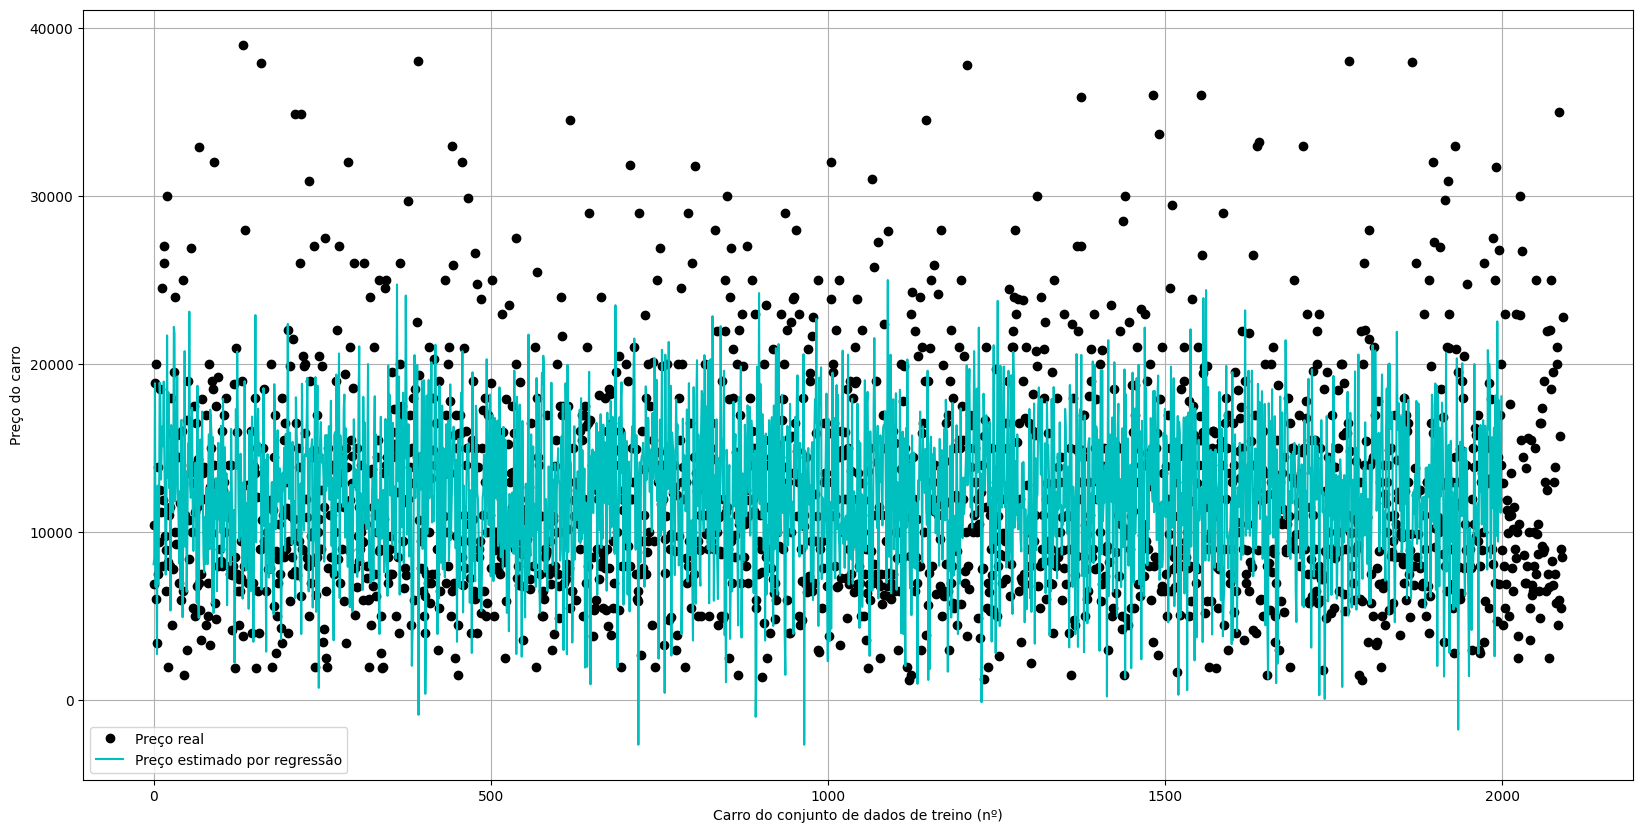

In [34]:
plt.figure(figsize=(20, 10))

amostragemDosCarros = 2000 #qtd de carros que serao plotados

plt.plot(cars_data['price'][:amostragemDosCarros].index, cars_data['price'][:amostragemDosCarros], "ko")
plt.plot(precosPorRegressao[:amostragemDosCarros].index, precosPorRegressao[:amostragemDosCarros], "c")


#Formatando o grafico:
plt.grid()
plt.xlabel("Carro do conjunto de dados de treino (nº)")
plt.ylabel("Preço do carro")

plt.legend(["Preço real", "Preço estimado por regressão"])

In [35]:
print("Erro quadratico médio da regressão: ", np.sum((e)**2) / len(e))

Erro quadratico médio da regressão:  21324151.01090952


In [36]:
print("Raiz do erro da regressão: ",  math.sqrt(np.sum((e)**2) / len(e)) )

Raiz do erro da regressão:  4617.808030972003


# Resultado da regressão com os dados de testes


In [37]:
try:
  cars_test = pd.read_csv("vehicles_cleaned_test.csv")
except:
  cars_test = pd.read_csv("/content/drive/MyDrive/Fundamento de SIstemas Eletrônicos Inteligentes/Exercicios Computacionais/Exercicio 1/vehicles_cleaned_test.csv")

In [38]:
fuel_test_dummy = pd.get_dummies(cars_test['fuel'])
type_test_dummy = pd.get_dummies(cars_test['type'])
cylinders_test_dummy = pd.get_dummies(cars_test['cylinders'])
transmission_test_dummy = pd.get_dummies(cars_test['transmission'])
condition_test_dummy = pd.get_dummies(cars_test['condition'])
size_test_dummy = pd.get_dummies(cars_test['size'])

In [39]:
test_data = cars_test[['year', 'odometer']]
test_data = test_data.join(condition_dummy)
test_data = test_data.join(fuel_dummy)
test_data = test_data.join(type_dummy)
test_data = test_data.join(cylinders_dummy)
test_data = test_data.join(transmission_dummy)
test_data = test_data.join(size_dummy)

In [40]:
test_data = combinarColunas(test_data)

In [41]:
matriz_de_entrada = extraiVariaveisDeInteresse(test_data)

In [42]:
pd.DataFrame(matriz_de_entrada)

,0,1,2,3,4,5,6,7,8,9
0,1.0,18.0,1.0,0.0,1.0,19000.0,1.0,1.0,0.0,1.0
1,1.0,17.0,0.0,0.0,1.0,68000.0,1.0,1.0,0.0,1.0
2,1.0,18.0,1.0,1.0,1.0,41200.0,1.0,1.0,0.0,0.0
3,1.0,15.0,1.0,0.0,0.0,82845.0,1.0,1.0,0.0,1.0
4,1.0,19.0,0.0,0.0,1.0,29638.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2079,1.0,17.0,1.0,0.0,1.0,33734.0,1.0,1.0,0.0,1.0
2080,1.0,17.0,1.0,0.0,1.0,71219.0,1.0,1.0,0.0,0.0
2081,1.0,18.0,1.0,1.0,1.0,37000.0,1.0,1.0,0.0,0.0
2082,1.0,11.0,0.0,1.0,0.0,45346.0,1.0,1.0,1.0,0.0


In [43]:
test_precos_d = resulta_precos(wo, matriz_de_entrada)

In [44]:
precos_estimados = pd.DataFrame(test_precos_d, columns = ['price'])

In [45]:
cars_test['price']

0       11995
1       20500
2       15800
3       20980
4       13999
        ...  
2079    15895
2080    14390
2081    17995
2082     8900
2083    12000
Name: price, Length: 2084, dtype: int64

In [46]:
precos_estimados

,price
0,17771.252983
1,18027.243680
2,16900.235551
3,12048.003377
4,19983.730932
...,...
2079,16072.228116
2080,12112.126040
2081,17128.310031
2082,16862.077822


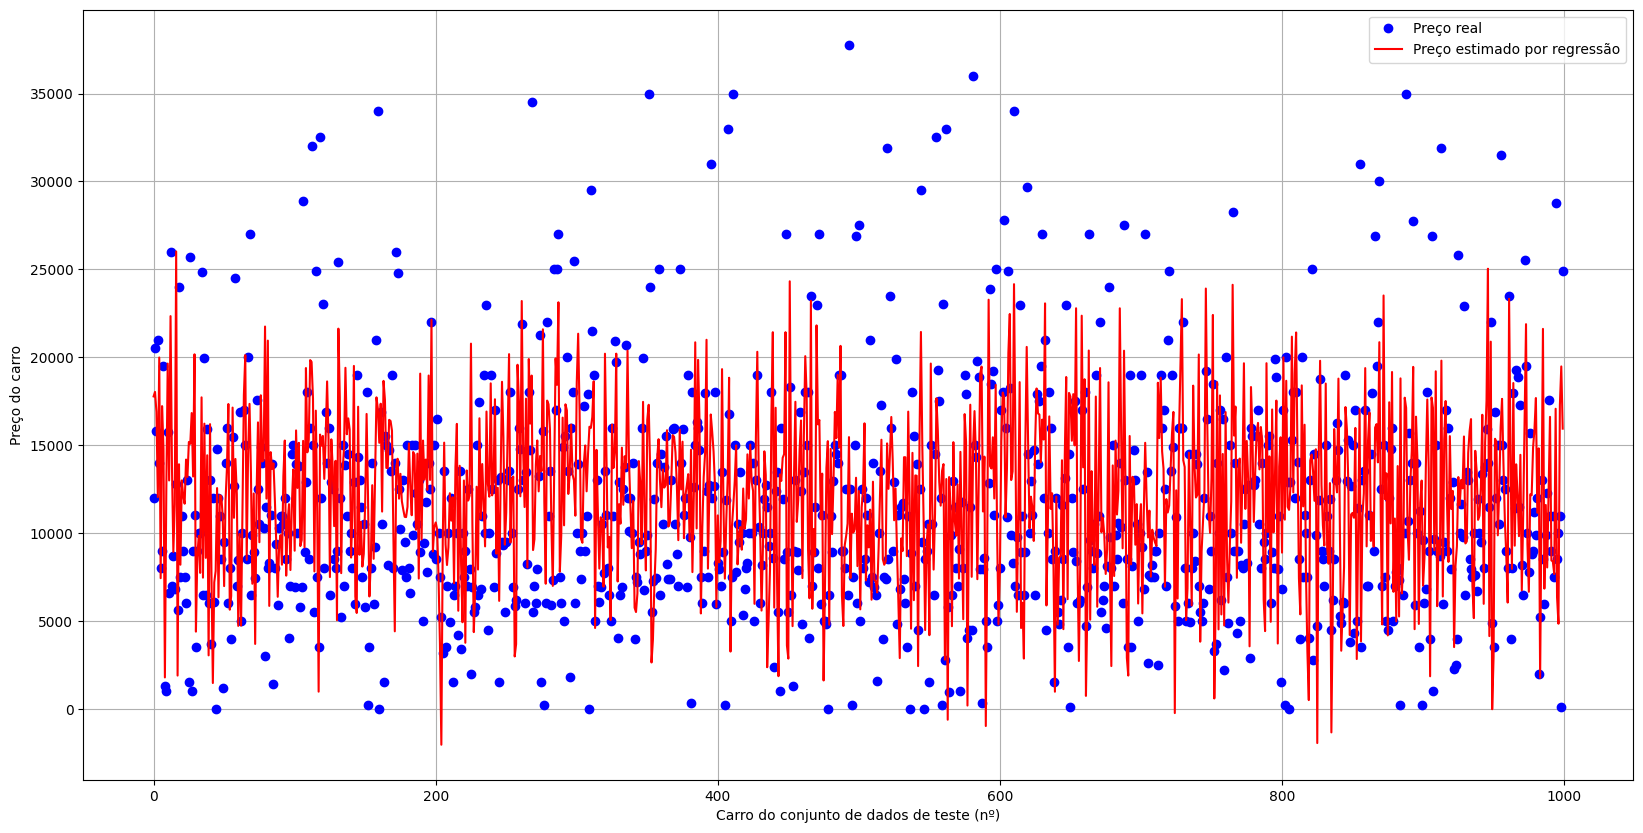

In [47]:
plt.figure(figsize=(20, 10))

amostragemDosCarros = 1000 #qtd de carros que serao plotados

plt.plot(cars_test['price'][:amostragemDosCarros].index, cars_test['price'][:amostragemDosCarros], "bo")
plt.plot(precos_estimados[:amostragemDosCarros].index, precos_estimados[:amostragemDosCarros], "r")

#Formatando o grafico:
plt.grid()
plt.xlabel("Carro do conjunto de dados de teste (nº)")
plt.ylabel("Preço do carro")

plt.legend(["Preço real", "Preço estimado por regressão"])

In [48]:

erroTeste = pd.DataFrame(cars_test['price']).subtract(precos_estimados).to_numpy()
print(erroTeste) # erro teste representa a matriz do preço verdadeiro subtraido do preco estimado
mse = np.sum(((erroTeste)**2) / len(erroTeste))

[[-5776.25298279]
 [ 2472.75631996]
 [-1100.2355508 ]
 ...
 [  866.68996947]
 [-7962.07782248]
 [-1255.18592333]]


In [49]:
print("Erro quadratico médio: ", np.sum((erroTeste)**2) / len(erroTeste))

Erro quadratico médio:  34687152.180375464


In [50]:
print("Raiz do erro quadratico médio: ", rmse )

NameError: ignored